In [3]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sys
sys.path.insert(1, '/Users/emmagurcan/Documents/France/ENS/M1/stageM1/analysis')
from functions_MSM74 import *

In [18]:
ncctd = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74_ctd.nc"
nclonlat = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74_lonlat.nc"
readcp = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/MSM74-VMADCP_allfiles/msm_074_1_vmadcp_75khz_01.nc"
repctd = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw/MSM74_CTD.tab"
repctd2 = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw/MSM74_CTD_2.tab"
raw = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw_ctd.nc"
lonlatev = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/clean_lonlatev.nc"

In [19]:
ds = nc.Dataset(lonlatev)

In [20]:
ds.variables.keys()

dict_keys(['Event', 'Latitude', 'Longitude'])

In [21]:
lats = ds['Latitude']
lons = ds['Longitude']

In [22]:
lons.shape

(102,)

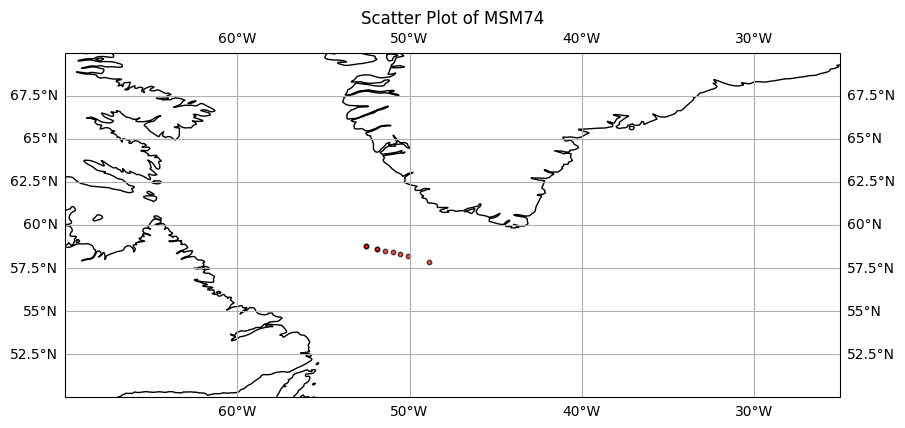

In [28]:
plot_coords(lons[63:72], lats[63:72])

In [3]:
# # Define the headers for the data
# headers = [
#     "Event", "Time", "Press [dbar]", "Depth water [m]", "Temp [°C]", "Sal", 
#     "O2 [µmol_kg]", "SV [m_s]", "Sigma in situ [kg_m**3]", "Fluorescence [arbitrary units]", 
#     "Turbidity [NTU]", "Attenuation [1_m]"
# ]

# # Read the first .tab file (ctd)
# df_ctd = pd.read_csv(repctd, sep="\t", skiprows=150, names=headers)

# # Read the second .tab file (ctd2)
# df_ctd2 = pd.read_csv(repctd2, sep="\t", names=headers)

# # Concatenate the two DataFrames (ctd first, then ctd2)
# df_combined = pd.concat([df_ctd, df_ctd2], ignore_index=True)

# # Convert the "Date_Time" column to datetime format
# df_combined["Time"] = pd.to_datetime(df_combined["Time"], errors="coerce")

# # Convert all numerical columns to numeric, coercing errors to NaN
# numerical_columns = [
#     "Press [dbar]", "Depth water [m]", "Temp [°C]", "Sal", "O2 [µmol_kg]", "SV [m_s]", 
#     "Sigma in situ [kg_m**3]", "Fluorescence [arbitrary units]", "Turbidity [NTU]", "Attenuation [1_m]"
# ]

# # Convert these columns to numeric, setting errors='coerce' to replace any non-numeric values with NaN
# df_combined[numerical_columns] = df_combined[numerical_columns].apply(pd.to_numeric, errors='coerce')

# # Convert to xarray Dataset
# ds = xr.Dataset.from_dataframe(df_combined)

# # Save as a single NetCDF file
# ds.to_netcdf("combined_ctd_data.nc")

# print("NetCDF file saved as combined_ctd_data.nc")


In [4]:
import pandas as pd
import xarray as xr

# Define headers
headers = [
    "Event", "Time", "Press [dbar]", "Depth water [m]", "Temp [C]", "Sal", 
    "O2 [umol_kg]", "SV [m_s]", "Sigma in situ [kg_m**3]", "Fluorescence [arbitrary units]", 
    "Turbidity [NTU]", "Attenuation [1_m]"
]

# Read first .tab file
df_ctd = pd.read_csv(repctd, sep="\t", skiprows=128, names=headers)

# Read second .tab file
df_ctd2 = pd.read_csv(repctd2, sep="\t", names=headers)

# Clean column names (remove extra spaces, if any)
df_ctd.columns = df_ctd.columns.str.strip()
df_ctd2.columns = df_ctd2.columns.str.strip()

# Convert problematic columns to numeric, forcing errors to NaN
numeric_columns = [
    "Press [dbar]", "Depth water [m]", "Temp [C]", "Sal", "O2 [umol_kg]", 
    "SV [m_s]", "Sigma in situ [kg_m**3]", "Fluorescence [arbitrary units]", 
    "Turbidity [NTU]", "Attenuation [1_m]"
]

for col in numeric_columns:
    df_ctd[col] = pd.to_numeric(df_ctd[col], errors="coerce")
    df_ctd2[col] = pd.to_numeric(df_ctd2[col], errors="coerce")

# Ensure 'Time' is a string (avoid datetime auto-parsing issues)
df_ctd["Time"] = df_ctd["Time"].astype(str)
df_ctd2["Time"] = df_ctd2["Time"].astype(str)

# Convert to xarray Dataset (reset index to avoid issues)
ds = xr.Dataset.from_dataframe(df_ctd.reset_index())
ds2 = xr.Dataset.from_dataframe(df_ctd2.reset_index())

# Save to NetCDF
ds.to_netcdf("raw_ctd.nc")
ds2.to_netcdf("raw_ctd2.nc")


/var/folders/08/g_gjz7kj0db8g7wf0vbs2mjw0000gn/T/ipykernel_94958/2256085859.py:12: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ctd = pd.read_csv(repctd, sep="\t", skiprows=128, names=headers)


In [5]:
# Load the NetCDF file
raw_ctd = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw_ctd.nc"
raw_ctd2 = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/raw_ctd2.nc"
lon_lat_event = "/Users/emmagurcan/Documents/France/ENS/M1/stageM1/data/Data_MSM74/lon_lat_event.nc"


# Open the NetCDF file in append mode
ds_ctd = nc.Dataset(raw_ctd, mode="a")

# Open the NetCDF file containing Event, Latitude, and Longitude
lonlatev = nc.Dataset(lon_lat_event)

# Extract variables
events = lonlatev.variables["Event"][:]
latitudes_nc = lonlatev.variables["Latitude"][:]
longitudes_nc = lonlatev.variables["Longitude"][:]

# Decode events if they are stored as bytes
# if events.dtype.kind in {'S', 'O'}:  # Check if string/bytes
#     events = np.array([e.tobytes().decode().strip() for e in events])

# Convert to dictionary: Event -> {"latitude": lat, "longitude": lon}
event_latlon_dict = {event: {"latitude": lat, "longitude": lon} 
                     for event, lat, lon in zip(events, latitudes_nc, longitudes_nc)}

# Close the event NetCDF file (no longer needed)
lonlatev.close()

# Create arrays to store lat/lon values for each row in ds_ctd
num_rows = len(ds_ctd.variables["Event"][:])
lat_array = np.full(num_rows, np.nan)  # Initialize with NaNs
lon_array = np.full(num_rows, np.nan)

# Decode ds_ctd Event values if needed
ds_ctd_events = ds_ctd.variables["Event"][:]
# if ds_ctd_events.dtype.kind in {'S', 'O'}:
#     ds_ctd_events = np.array([e.tobytes().decode().strip() for e in ds_ctd_events])

# Map latitude and longitude based on Event
for i, event in enumerate(ds_ctd_events):
    if event in event_latlon_dict:
        lat_array[i] = event_latlon_dict[event]["latitude"]
        lon_array[i] = event_latlon_dict[event]["longitude"]

# Add new latitude and longitude variables to the NetCDF file
if "Latitude" not in ds_ctd.variables:
    lat_var = ds_ctd.createVariable("Latitude", "f4", ("index",))
    lon_var = ds_ctd.createVariable("Longitude", "f4", ("index",))
else:
    lat_var = ds_ctd.variables["Latitude"]
    lon_var = ds_ctd.variables["Longitude"]

# Assign values
lat_var[:] = lat_array
lon_var[:] = lon_array

print(ds_ctd['Latitude'])
# Close the NetCDF file
ds_ctd.close()


<class 'netCDF4._netCDF4.Variable'>
float32 Latitude(index)
unlimited dimensions: 
current shape = (256804,)
filling on, default _FillValue of 9.969209968386869e+36 used


/var/folders/08/g_gjz7kj0db8g7wf0vbs2mjw0000gn/T/ipykernel_94958/2182663387.py:42: UserWarning: Warning: converting a masked element to nan.
  lat_array[i] = event_latlon_dict[event]["latitude"]
/var/folders/08/g_gjz7kj0db8g7wf0vbs2mjw0000gn/T/ipykernel_94958/2182663387.py:43: UserWarning: Warning: converting a masked element to nan.
  lon_array[i] = event_latlon_dict[event]["longitude"]


In [ ]:
# Extract event name, latitude, and longitude using regex
def extract_lat_lon(event_str):
    match = re.search(r"(MSM74_\d+-\d+) \* LATITUDE: ([\d.-]+) \* LONGITUDE: ([\d.-]+)", str(event_str))
    if match:
        return match.group(1), float(match.group(2)), float(match.group(3))
    return None, None, None

df[["Event", "Latitude", "Longitude"]] = df.iloc[:, -1].apply(lambda x: pd.Series(extract_lat_lon(x)))  